In [1]:
from tools import tsplot, tsdiag, cusumRepeat, simArima
from statsmodels.tsa.arima_model import ARIMA, ARMA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Is the process stationary and invertible?

In [2]:
nSample = 200
ar = np.array([-0.8, -0.1]) # Auto Regresive parameters
ma = np.array([ 0.8])    # Moving Average parameters


def isStationary(ar):
    arroots = np.polynomial.Polynomial(np.r_[1, ar]).roots()
    if np.all(np.abs(arroots) > 1.0):
        print('It is STATIONARY because the AR roots are outside of unit circle')
        return np.all(np.abs(arroots) > 1.0)
    else:
        print('It is NOT STATIONARY because AR the roots are inside of unit circle')
        return np.all(np.abs(arroots) > 1.0)
    
def isInvertible(ma):
    maroots = np.polynomial.Polynomial(np.r_[1, ma]).roots()
    if np.all(np.abs(maroots) > 1.0):  
        print('It is INVERTIBLE because the MA roots are outside of unit circle')
        return np.all(np.abs(maroots) > 1.0)
    else:
        print('It is NOT INVERTIBLE because MA the roots are inside of unit circle')   
        return np.all(np.abs(maroots) > 1.0)
isStationary(ar), isInvertible(ma)

It is STATIONARY because the AR roots are outside of unit circle
It is INVERTIBLE because the MA roots are outside of unit circle


(True, True)

# 3. Simulate 10 realisations with 200 observations

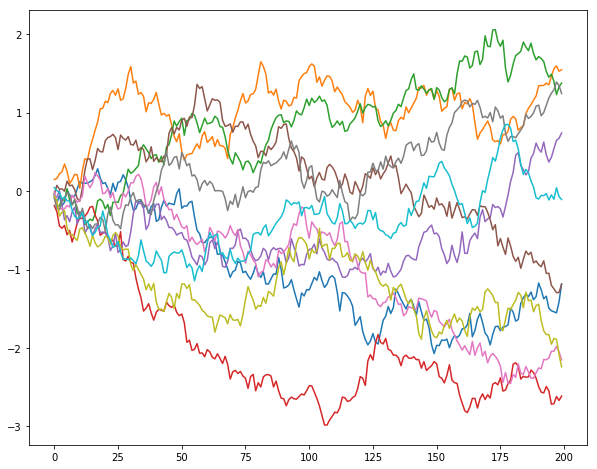

In [33]:
from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, _plot_corr, _prepare_data_corr_plot
from statsmodels.graphics import utils
from statsmodels.graphics.tsaplots import plot_pacf  
plt.figure(figsize=(10, 8))

acfs = []
acfs_confs = []
pacfs = []
pacfs_confs = []

var_list=[]
for i in range(10):
    dParam = 1                  # Integrated parameter
    sim1 = simArima(ar = ar, d = dParam, ma = ma, n = nSample, sigma = 0.1)

    acfs.append(acf(sim1, nlags=25, alpha=0.95)[0])
    acfs_confs.append(acf(sim1, nlags=25, alpha=0.95)[1])
    pacfs.append(pacf(sim1, nlags=25, alpha=0.95)[0])
    pacfs_confs.append(pacf(sim1, nlags=25, alpha=0.95)[1])
    plt.plot(sim1)
    returns = sim1[:-1] -sim1[1:] 
    var_list.append(np.var(returns))
    
plt.show()



In [24]:
res = np.zeros(len(acfs_confs[0]))
for el in acfs_confs:
    res = el.T + res
1- res/10

array([[0.        , 0.04215948, 0.08394697, 0.11825694, 0.15474425,
        0.18810515, 0.2227311 , 0.25530304, 0.28645944, 0.31681595,
        0.34694115, 0.37719133, 0.40595109, 0.43532787, 0.46460063,
        0.48949964, 0.50974669, 0.53086409, 0.55401481, 0.57791728,
        0.60425143, 0.63043316, 0.65482744, 0.68021458, 0.70357338,
        0.72618535],
       [0.        , 0.0332914 , 0.06897035, 0.0993225 , 0.13275447,
        0.16362944, 0.196157  , 0.22693212, 0.25652497, 0.28550627,
        0.31441353, 0.3435813 , 0.37137794, 0.39989331, 0.42839637,
        0.45260616, 0.47222945, 0.49277639, 0.51540578, 0.53883571,
        0.56474385, 0.59054681, 0.61460471, 0.63969129, 0.6627827 ,
        0.68515588]])

# 4. and 5. Estimate the ACF for each realisation and plot those

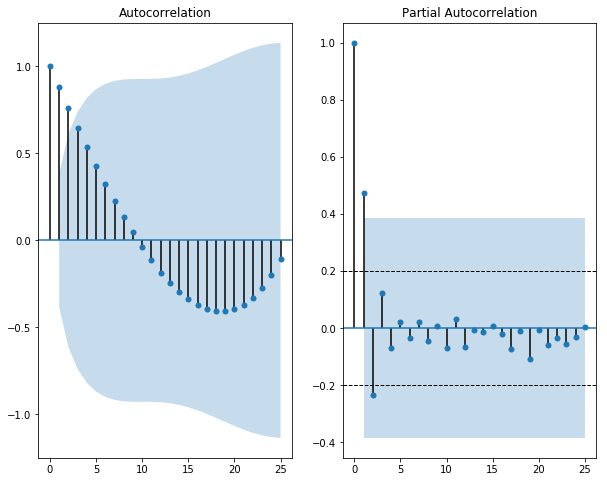

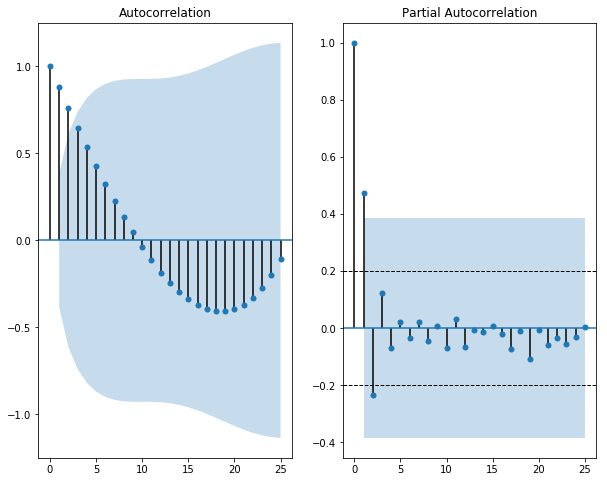

In [29]:
plt.figure(figsize=(10, 8))
layout = (1, 2)
acf_ax = plt.subplot2grid(layout, (0, 0))
pacf_ax = plt.subplot2grid(layout, (0, 1))

plot_acf(np.sum(np.array(acfs)/len(acfs), axis=0), lags=25, ax=acf_ax)
plt.axhline(0.2, color='k', linestyle='dashed', linewidth=1)
plt.axhline(-0.2, color='k', linestyle='dashed', linewidth=1)
plot_pacf(np.sum(np.array(pacfs)/len(pacfs), axis=0), lags=25, ax=pacf_ax, method='ywm')

In [37]:
import pandas as pd
pd.DataFrame([var_list])

,0,1,2,3,4,5,6,7,8,9
0,0.01062,0.01134,0.009928,0.008673,0.011306,0.010591,0.009704,0.010613,0.011979,0.008995


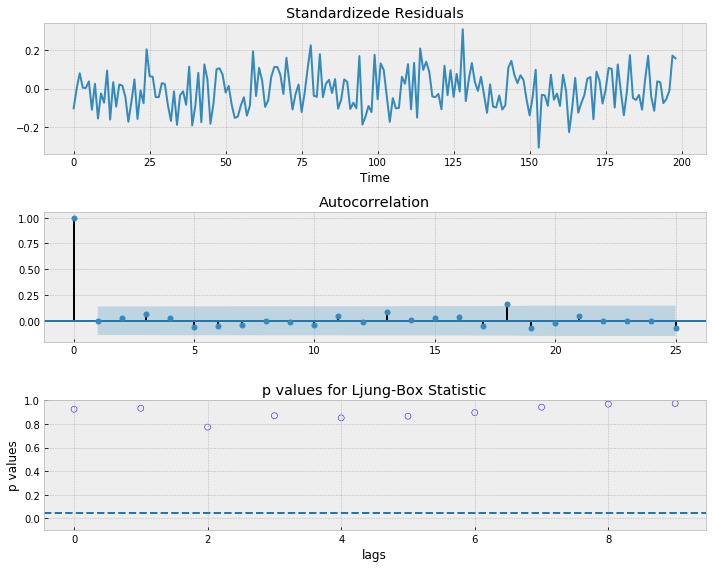

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  199
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 173.074
Method:                           mle   S.D. of innovations              0.101
Date:                Tue, 02 Apr 2019   AIC                           -338.148
Time:                        18:57:14   BIC                           -324.975
Sample:                             1   HQIC                          -332.816
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.8492      0.146     -5.830      0.000      -1.135      -0.564
ar.L2.D.y     -0.0273      0.075     -0.361      0.718      -0.175       0.121
ma.L1.D.y      0.8798      0.128      6.857      0.000       0.628       1.131
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2259           +0.0000j            1.2259            0.5000
AR.2          -29.9207           +0.0000j           29.9207            0.5000
MA.1           -1.1366           +0.0000j            1.1366            0.5000
-----------------------------------------------------------------------------
"""

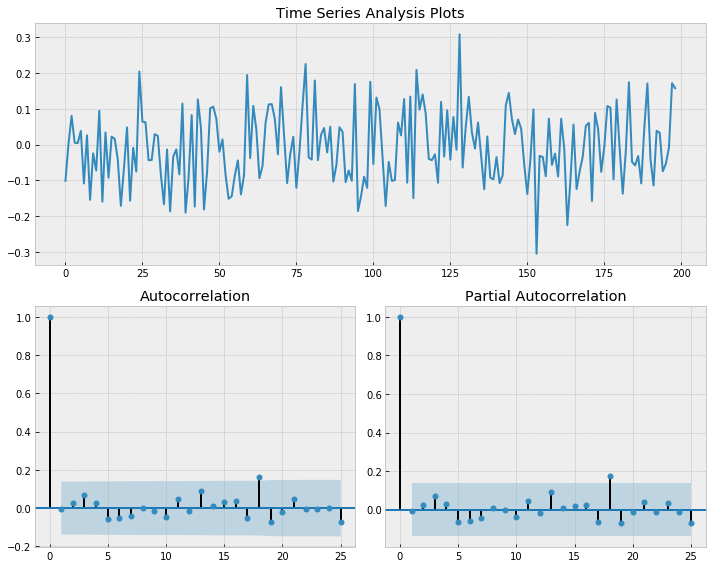

In [12]:
model = ARIMA(sim1, order = (2,1,1)).fit(method='mle', trend='nc')
# model = ARIMA(sim1, (1, 0, 1)).fit(method='mle', trend='nc')


tsdiag(model.resid)
plt.show()
tsplot(model.resid)

model.summary(alpha=0.05)


In [13]:
model.arparams

array([-0.84916917, -0.02726363])

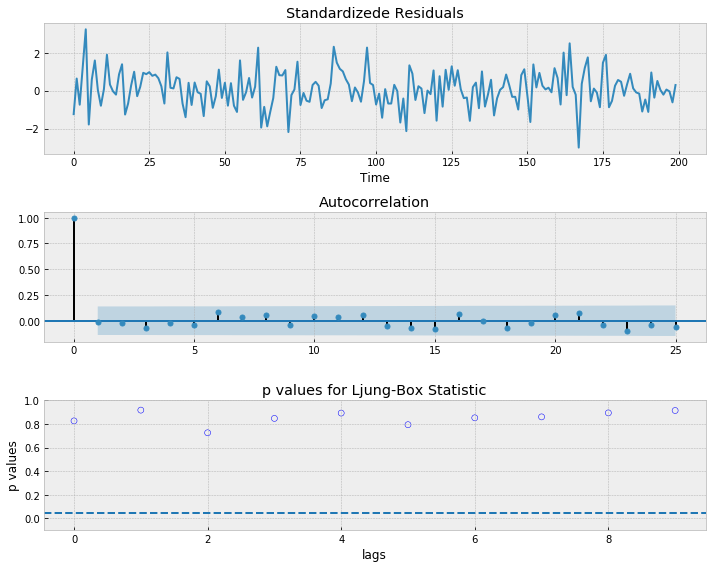

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     ARMA(3, 1)   Log Likelihood                -275.290
Method:                           mle   S.D. of innovations              0.952
Date:                Fri, 29 Mar 2019   AIC                            560.580
Time:                        10:22:36   BIC                            577.071
Sample:                             0   HQIC                           567.254
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5954      0.070      8.548      0.000       0.459       0.732
ar.L2.y       -0.4760      0.066     -7.158      0.000      -0.606      -0.346
ar.L3.y        0.6771      0.052     12.965      0.000       0.575       0.779
ma.L1.y        0.2326      0.092      2.522      0.012       0.052       0.413
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1098           -0.0000j            1.1098           -0.0000
AR.2           -0.2034           -1.1355j            1.1536           -0.2782
AR.3           -0.2034           +1.1355j            1.1536            0.2782
MA.1           -4.2993           +0.0000j            4.2993            0.5000
-----------------------------------------------------------------------------
"""

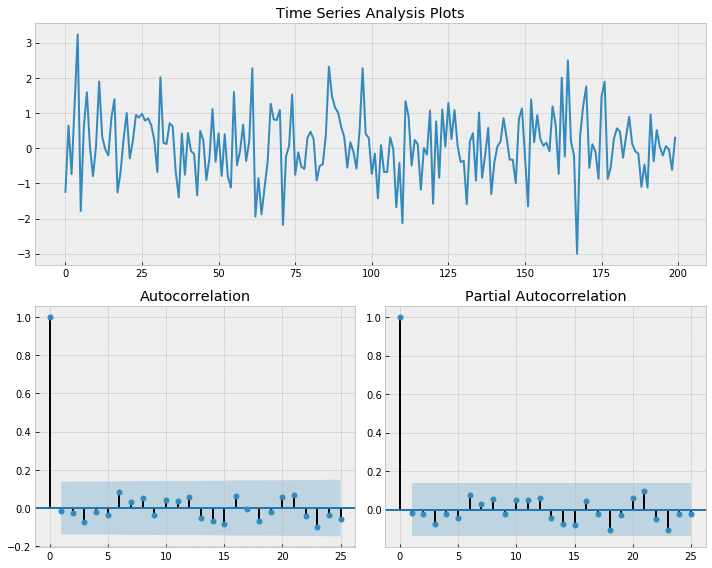

In [8]:
nSample = 200
ar = np.array([ 0.4, -0.3, 0.6]) # Auto Regresive parameters
ma = np.array([ 0.4])    # Moving Average parameters
dParam = 0                 # Integrated parameter
sim1 = simArima(ar = ar, d = dParam, ma = ma, n = nSample)
# tsplot(sim1)


model = ARIMA(sim1, order = (3,0,1)).fit(method='mle', trend='nc')
# model = ARIMA(sim1, (1, 0, 1)).fit(method='mle', trend='nc')


tsdiag(model.resid)
plt.show()
tsplot(model.resid)

model.summary(alpha=0.05)


In [ ]:

a1 = ARIMA(sim1, order = (2,0,1)).fit(method='mle', trend='c')
tsdiag(a1.resid) 
plt.show()
a1.summary(alpha=0.05)

In [ ]:

a1 = ARIMA(sim1, order = (3,0,1)).fit(method='mle', trend='c')
tsdiag(a1.resid) 
plt.show()
a1.summary(alpha=0.05)

In [ ]:

a1 = ARIMA(sim1, order = (2,0,0)).fit(method='mle', trend='nc')
tsdiag(a1.resid) 
plt.show()
a1.summary(alpha=0.05)

In [ ]:

a1 = ARIMA(sim1, order = (1,0,1)).fit(method='css', trend='nc')
tsdiag(a1.resid) 
plt.show()
a1.summary(alpha=0.05)